# Assignment 1

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2025/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday March 3rd, 2025 at 23:55. Hand in your files via DTU Learn. 

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import math

## Part 1

From week 1's exercise, I'd like you to complete the "*Exercise 3*: Temporal patterns". The one where the main plot is the year-by-year evolution of the 10 focus crimes.

**IMPORTANT**: FOR THIS AND ALL SUBSEQUENT EXERCISES, I WANT YOU TO USE THE FULL DATASET FROM 2003 TO 2025.

In [7]:
# read the dataset
data = pd.read_csv('../data/police_incidents.csv')

# define the 10 focus crimes
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])

# filter the data to only include the focus crimes
data_focus = data[data['Incident Category'].isin(focuscrimes)]


Important preprocessing steps made to the file containing the full dataset: 
- Not relevat columns were deleted and columns with different names in the two given datasets where renamed to the same name. 
- Date-type columns where processed to have the same format in both datasets
- Data in columns 'Incident Category', 'Incident Description' and 'Police District' was converted to upper case for all instances. 
- Rows with missing values were dropped. 
- Categories that were named similarly where grouped under the title of the pertinent focus crime. 


Year with most crimes:  2018

Year with least crimes:  2025 



/var/folders/tf/4m3mvmrd1ddgcyk882fq_c140000gn/T/ipykernel_30410/3042318818.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_focus['Incident Year'] = pd.to_datetime(data_focus['Incident Date']).dt.year


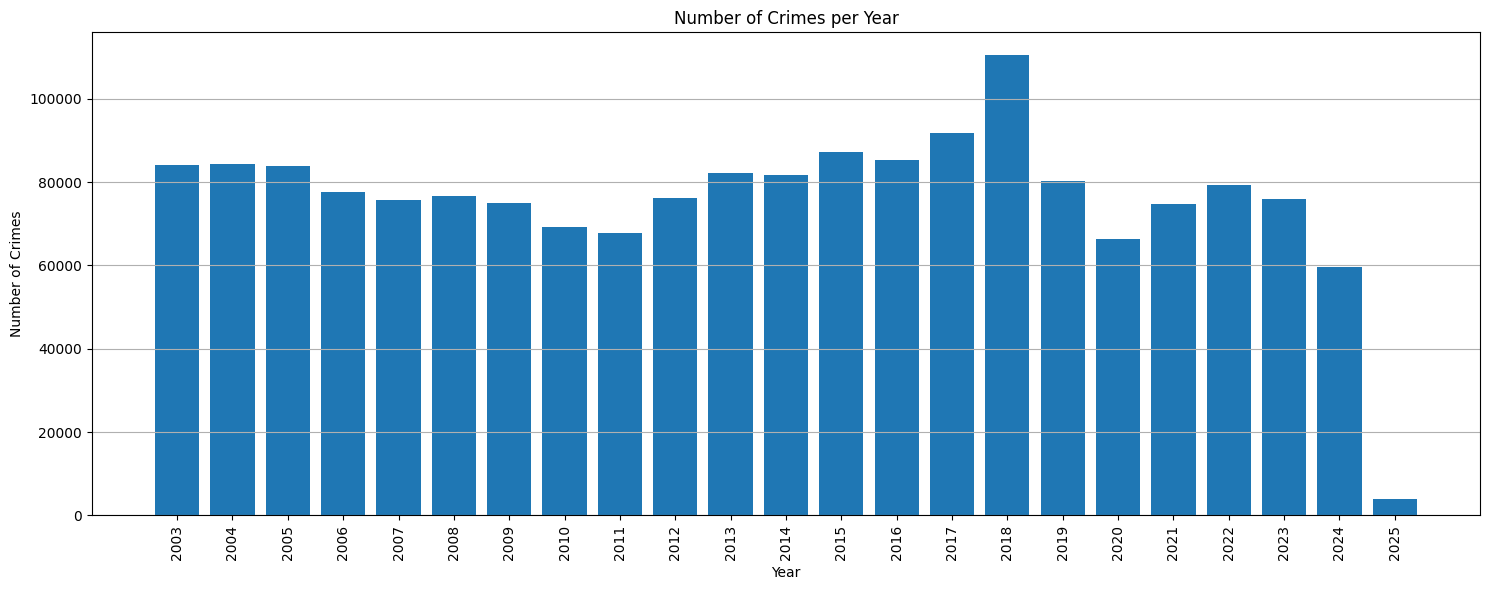

In [5]:
# Number of crimes per year

# count number of crimes per year
data_focus['Incident Year'] = pd.to_datetime(data_focus['Incident Date']).dt.year
crimes_per_year = data_focus['Incident Year'].value_counts().sort_index()

# year with most crimes
year_with_most_crimes = crimes_per_year.idxmax()
print('\nYear with most crimes: ', year_with_most_crimes)

# year with least crimes
year_with_least_crimes = crimes_per_year.idxmin()
print('\nYear with least crimes: ', year_with_least_crimes, '\n')

# bar plot of the number of crimes per year
plt.figure(figsize=(15, 6))
plt.bar(crimes_per_year.index, crimes_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes per Year')
plt.xticks(crimes_per_year.index, rotation=90)  # Rotate the x-axis labels vertically
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**What is the year with most focus crimes?**

The year with most focus crimes is 2018, with more than 100.000 crimes. 

**What is the year with the fewest focus crimes?**

The year with the fewest focus crimes, without taking into account 2025, as it does not contain information of the whole year, is 2024, with a little bit less than 60.000 crimes. 

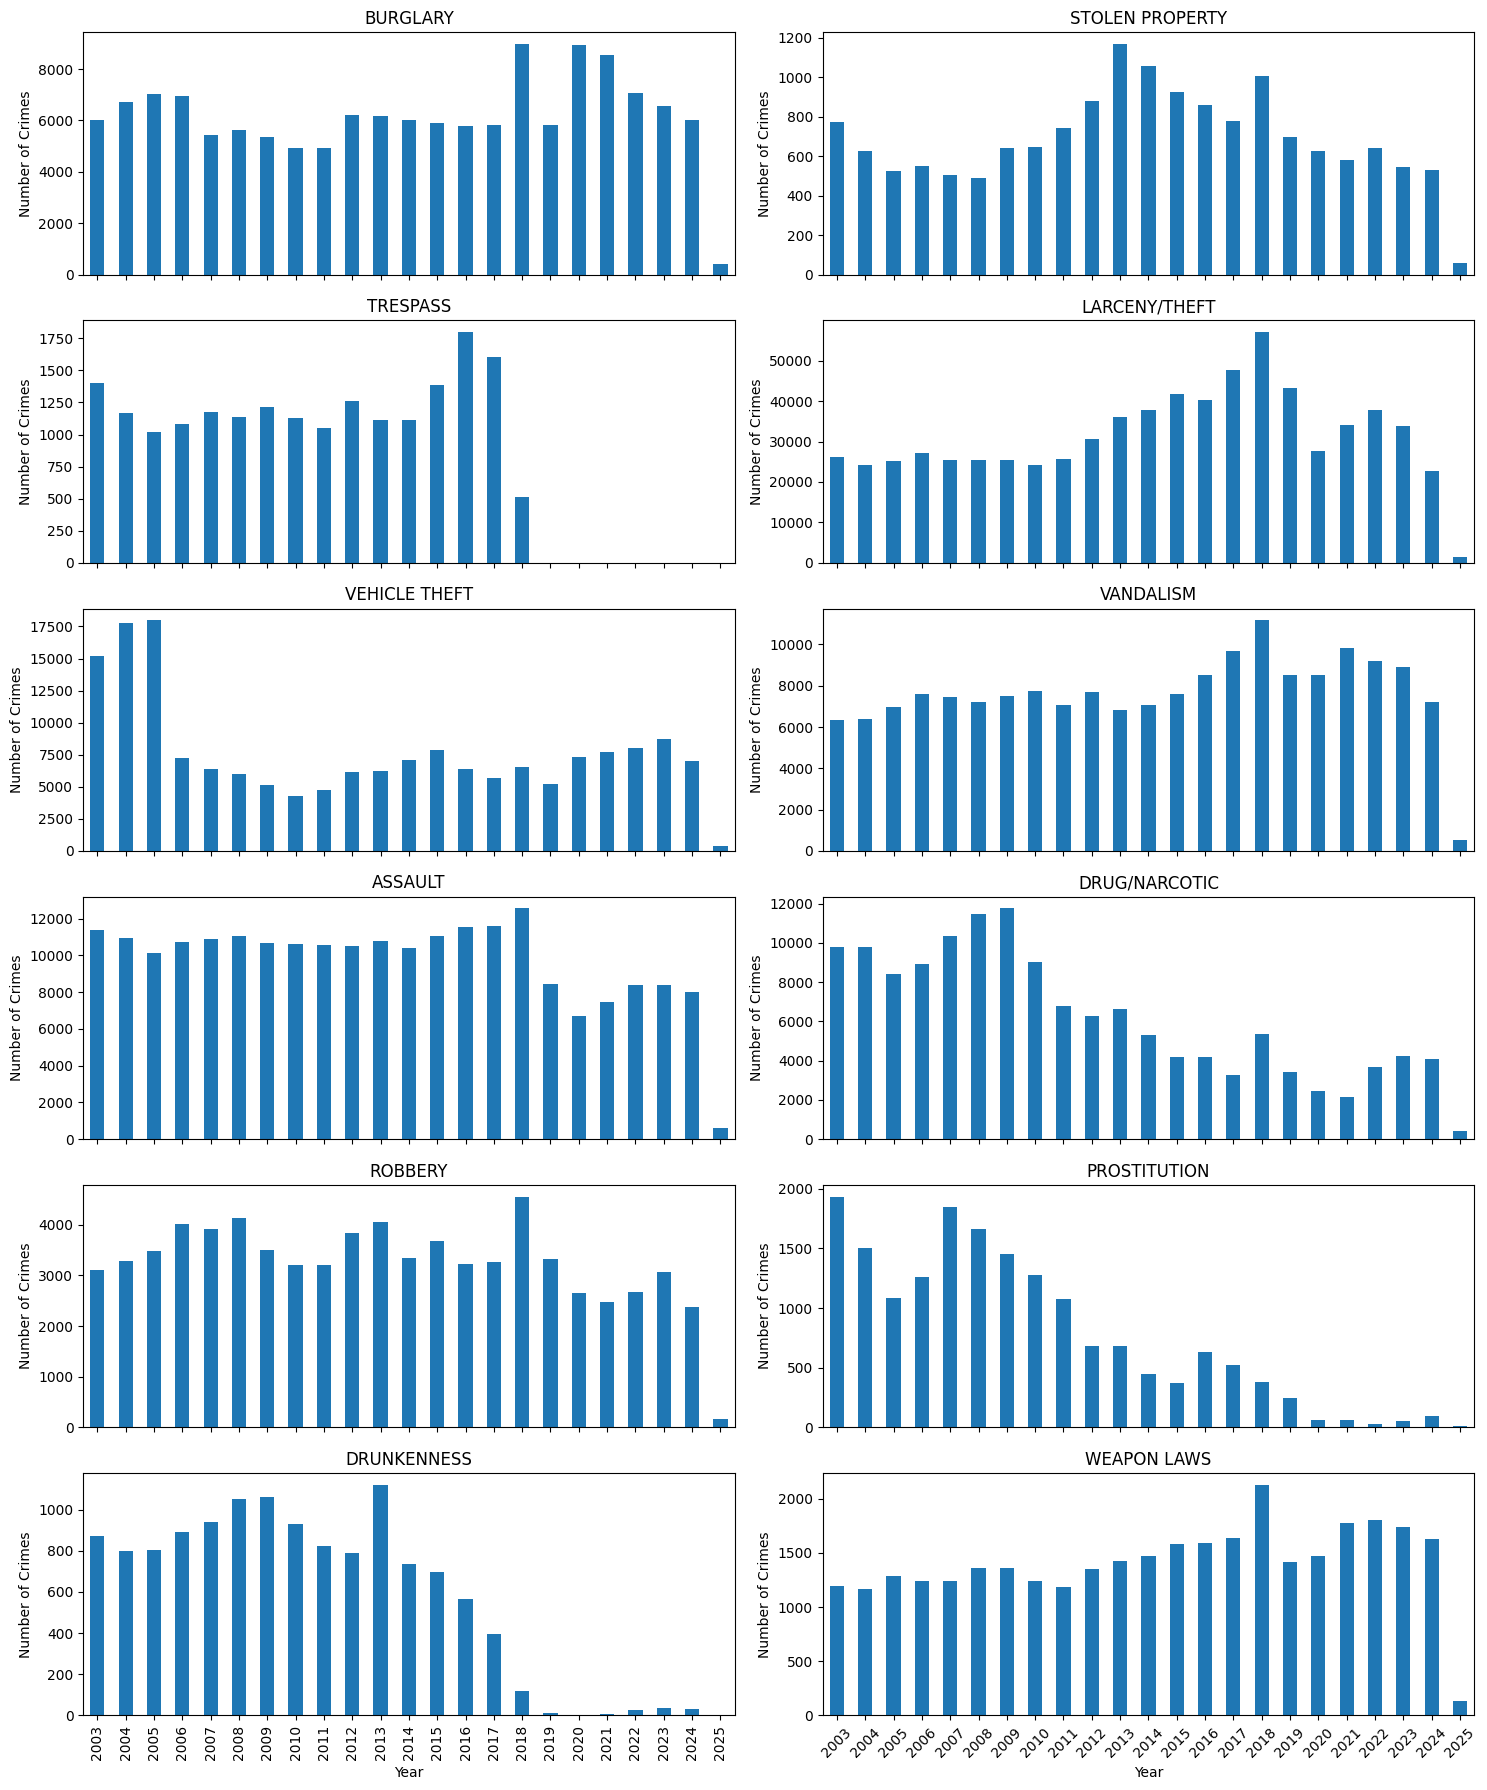

In [6]:
# Finally, Police chief Suneman is interested in the temporal development of only a subset of categories, the so-called focus crimes.
# Create bar-charts displaying the year-by-year development of each of these categories.

# Group data by category and year
category_year_counts = data_focus.groupby('Incident Category')['Incident Year'].value_counts().unstack()

# Define the number of rows and columns
num_cols = 2
num_categories = len(focuscrimes)
num_rows = math.ceil(num_categories / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows), sharex=True)
axes = axes.flatten()

for i, category in enumerate(focuscrimes):
    category_year_counts.loc[category].plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{category}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Number of Crimes')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Comment on at least three interesting trends in your plot:**

Several observations can be extracted from the plots. 
- First, there is a noticeable decrease in crimes related to drugs and narcotics, as well as prostitution, over the years. Drug-related crimes peaked in 2009 and have been declining since then. Prostitution-related crimes peaked in 2007 and have also been decreasing. While prostitution crimes appear to be nearly disappearing, drug-related crimes, although reduced, still occur relatively frequently.
- Second, vehicle theft crimes experienced a significant increase between 2003 and 2005. After this period, the number of vehicle thefts decreased but has remained relatively stable since 2006, indicating that vehicle theft is still a persistent issue.
- Crimes such as assault, weapon law violations, and robbery have remained relatively constant over the years. This consistency suggests that these types of crimes are ongoing issues that require continuous monitoring and intervention.
- Finally, crimes related to drunkenness and trespassing appear to be underreported or not monitored from 2019 onwards, as there is very little or no data collected for these crimes in the most recent period. This lack of data could indicate changes in reporting practices or enforcement priorities.

## Part 2

Next, I would like you to answer some of the questions related to the videos shown during week 2. Specifically, I would like you to

* Answer questions related to the main video-lecture on Data Visualization. (Where the first question is "What is the difference between *data* and *metadata*?")
* Answer questions related to the video on "Nice plots". That is, generate the list of 10 rules for nice plots.


## Part 3

We stay with week 2. I would also like you to complete the exercise in Week 2, Part 4, entitled "*Exercise*: Other cool ways to plot temporal data" (the one where we explore alternatives to bar-plots, such as calendar plots, for plotting temporal data).

In the exercise, i ask you to explore 3 different types of plots. For this assignment, you only need to do a calendar and polar bar chart.


## Part 4

From week 3, I'd like you to work on the exercise contained in Week 3, Part 3. Specifically, I would like you to **both** complete "*Excercise Part 1*: Connecting the dots and recreating plots from DAOST but using our own favorite dataset" and "*Excercise Part 2*". These exercises focus on reproducing figure 2.1, 2.4 and 2.11 and exploring a few more ideas from the book using data from SFPD.


## Part 5

Finally, I'd like you to work on the exercise "*Exercise*: Using all the tools to understand the temporal trends of prostitution in SF over time" in Week 4, Part 3. 